Saving ._SN04dt_040914_b01_DUP_WF.dat to ._SN04dt_040914_b01_DUP_WF.dat
Saving ._SN04dt_040919_b01_DUP_WF.dat to ._SN04dt_040919_b01_DUP_WF.dat
Saving ._SN04dt_040920_b01_DUP_WF.dat to ._SN04dt_040920_b01_DUP_WF.dat
Saving ._SN04dt_041024_b01_CLA_LD.dat to ._SN04dt_041024_b01_CLA_LD.dat
Saving ._SN04dt_041204_b01_DUP_WF.dat to ._SN04dt_041204_b01_DUP_WF.dat
Saving ._SN04ef_040907_b01_DUP_MS.dat to ._SN04ef_040907_b01_DUP_MS.dat
Saving ._SN04ef_040908_b01_CLA_BC.dat to ._SN04ef_040908_b01_CLA_BC.dat
Saving ._SN04ef_040909_b01_CLA_LD.dat to ._SN04ef_040909_b01_CLA_LD.dat
Saving ._SN04ef_040910_b01_CLA_BC.dat to ._SN04ef_040910_b01_CLA_BC.dat
Saving ._SN04ef_040914_b01_DUP_WF.dat to ._SN04ef_040914_b01_DUP_WF.dat
Saving ._SN04ef_040919_b01_DUP_WF.dat to ._SN04ef_040919_b01_DUP_WF.dat
Saving ._SN04ef_040920_b01_DUP_WF.dat to ._SN04ef_040920_b01_DUP_WF.dat
Saving ._SN04ef_041024_b01_CLA_LD.dat to ._SN04ef_041024_b01_CLA_LD.dat
Saving ._SN04eo_040919_b01_DUP_WF.dat to ._SN04eo_040919_b01_DUP

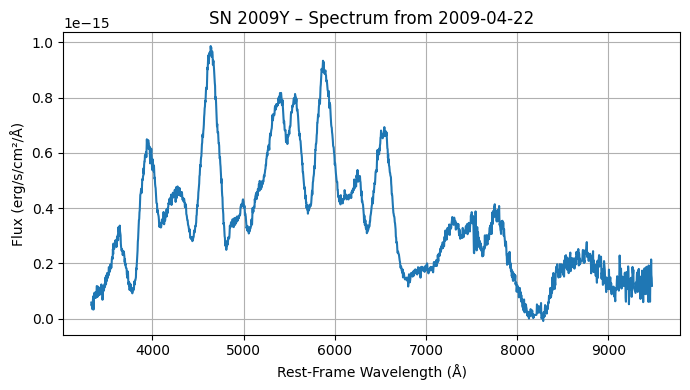

In [1]:
from google.colab import files

uploaded = files.upload()

import numpy as np
import matplotlib.pyplot as plt

filename = "SN09Y_090422_b01_DUP_BC.dat"

with open(filename, 'r') as f:
    header = [next(f).strip() for _ in range(7)]
    print("\n".join(header))

data = np.loadtxt(filename, skiprows=7)
wavelength = data[:, 0]
flux = data[:, 1]

plt.figure(figsize=(7, 4))
plt.plot(wavelength, flux)
plt.title('SN 2009Y – Spectrum from 2009-04-22')
plt.xlabel('Rest-Frame Wavelength (Å)')
plt.ylabel('Flux (erg/s/cm²/Å)')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-4052190156.py:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_spectral_flux = np.trapz(flux, wavelength)
/tmp/ipython-input-4052190156.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total += np.trapz(flux[mask], wavelength[mask])


           Fe        Ni        Co        Ca        Si                            SN                              File  Total Spectral Flux
0    0.142944  0.020644  0.057188  0.008754  0.055108      SN07on_071119_g01_NTT_EM      SN07on_071119_g01_NTT_EM.dat         6.409189e-11
1    0.102916  0.045634  0.070628  0.029718  0.060268      SN05al_050419_b01_DUP_WF      SN05al_050419_b01_DUP_WF.dat         9.743023e-13
2    0.187978  0.047591  0.073247  0.009870  0.047942      SN08fp_090224_b01_DUP_WF      SN08fp_090224_b01_DUP_WF.dat         3.802411e-13
3    0.142521  0.000000  0.006088  0.063978  0.000000      SN08hv_081210_b01_NTT_EF      SN08hv_081210_b01_NTT_EF.dat         9.354161e-12
4    0.112758  0.020751  0.049496  0.040071  0.063325       SN09Y_090224_b01_DUP_WF       SN09Y_090224_b01_DUP_WF.dat         1.947096e-11
5    0.121907  0.026242  0.065129  0.028349  0.060989      SN06gj_060928_b01_DUP_WF      SN06gj_060928_b01_DUP_WF.dat         9.990705e-13
6    0.077920  0.054160  0.

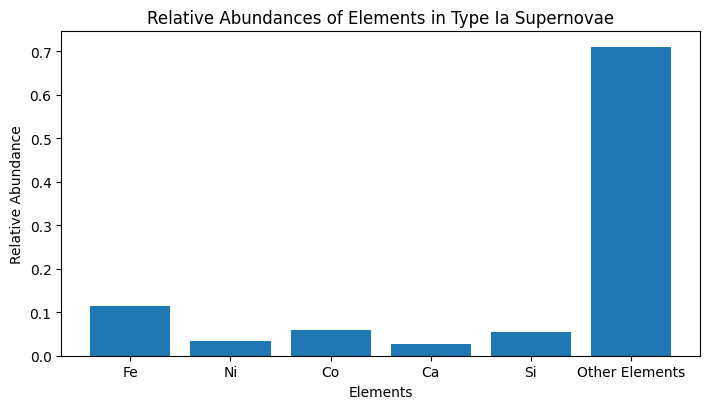

In [3]:
import glob
import pandas as pd
import os

# Defining wavelength ranges (in Å) for the main elements
element_windows = {
    "Fe": [(4700, 5200)],
    "Ni": [(7300, 7600)],
    "Co": [(5900, 6200)],
    "Ca": [(3900, 4000)],
    "Si": [(6100, 6400)]
}

# Read all .dat files
dat_files = glob.glob("*.dat")
element_data = []

for file in dat_files:
    try:
        # Load spectrum (skip commented header lines)
        data = np.loadtxt(file, comments="#")
        wavelength = data[:, 0]
        flux = data[:, 1]

        # Total spectral flux for proper normalization
        total_spectral_flux = np.trapz(flux, wavelength)

        element_fluxes = {}

        for element, ranges in element_windows.items():
            total = 0.0
            for wl_min, wl_max in ranges:
                mask = (wavelength >= wl_min) & (wavelength <= wl_max)
                if np.any(mask):
                    total += np.trapz(flux[mask], wavelength[mask])
            element_fluxes[element] = total

        # Relative abundances normalized by total spectral flux
        relative_abundance = {
            el: (val / total_spectral_flux if total_spectral_flux > 0 else 0)
            for el, val in element_fluxes.items()
        }

        relative_abundance.update({
            "SN": os.path.splitext(file)[0],
            "File": file,
            "Total Spectral Flux": total_spectral_flux
        })

        element_data.append(relative_abundance)

    except Exception as e:
        print(f"Error processing {file}: {e}")

# Create DataFrame and save to CSV
df = pd.DataFrame(element_data)
df.to_csv("element_relative_abundances.csv", index=False)
print(df.to_string())

# Average abundances
main_elements = ['Fe', 'Ni', 'Co', 'Ca', 'Si']
avg_main_abundances = df[main_elements].mean()

# Everything not in selected windows
df['Other Elements'] = 1 - df[main_elements].sum(axis=1)
avg_other_elements_abundances = df['Other Elements'].mean()

average_abundances = pd.concat([
    avg_main_abundances,
    pd.Series({"Other Elements": avg_other_elements_abundances})
])

# Plot
plt.figure(figsize=(7.2, 4.2))
plt.bar(average_abundances.index, average_abundances.values)
plt.xlabel("Elements")
plt.ylabel("Relative Abundance")
plt.title("Relative Abundances of Elements in Type Ia Supernovae")
plt.tight_layout()
plt.show()